<a href="https://colab.research.google.com/github/kikirikikrikri/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/EnriqueColladoLS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
int_rate_14['term'].loc[0]

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-05-30 22:15:33--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.3’

LoanStats_2018Q4.cs     [               <=>  ]  21.42M   897KB/s    in 26s     

2019-05-30 22:16:00 (849 KB/s) - ‘LoanStats_2018Q4.csv.zip.3’ saved [22458773]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4816.58","4816.58","1130.71","1130.71","783.42","347.29","0.0","0.0","0.0","Apr-2019","190.21","May-2019","Apr-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.95

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import numpy as np
import pandas as pd

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')


In [8]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

**DROP NA columns**

In [0]:
df = df.drop(['id', 'url', 'desc', 'member_id'], axis= 'columns')


## Work with strings

In [10]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [11]:
'13.56%'.strip('%')

'13.56'

In [12]:
type('13.56%'.strip('%'))

str

In [13]:
type(float('13.56%'.strip('%')))

float

**List Comprehension Example**

In [14]:
example_list = ['13.56%', '13.57%', '13.58%']  ####pa ratemes

def remove_percent(string):
  return float(string.strip('%'))

[remove_percent(item) for item in example_list]

[13.56, 13.57, 13.58]

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
  return float (string.strip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent) ###para ratemes
df.head()

**FILTER DATAFRAME BY TERM - EXEMPLE**

In [17]:
int_rate_14 = df[df['int_rate'] >= 14]
int_rate_14['term'].iloc[0]

' 36 months'

In [0]:
int_rate_14.reset_index()

In [23]:
df['term'].loc[0]

' 36 months'

In [0]:
int_rate_14.reset_index()

### Clean `emp_title`

Look at top 20 titles

In [31]:
df['emp_title'].value_counts(dropna=False).head(21)

NaN                         20947
Teacher                      2090
Manager                      1773
Registered Nurse              952
Driver                        924
RN                            726
Supervisor                    697
Sales                         580
Project Manager               526
General Manager               523
Office Manager                521
Owner                         420
Director                      402
Truck Driver                  387
Operations Manager            387
Nurse                         326
Engineer                      325
Sales Manager                 304
manager                       301
Supervisor                    270
Administrative Assistant      269
Name: emp_title, dtype: int64

In [27]:
df['emp_title'].isnull().sum()

20947

How often is `emp_title` null?

In [0]:
2097

In [0]:
import numpy as np

Clean the title and handle missing values

In [0]:
examples = ['owner', 'Supervisor', 'Project Manager', np.NaN]

In [0]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:      
    return "Unknown"
  


In [57]:
[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)

In [0]:
df['emp_title'].value_counts()

In [0]:
df['emp_title_manager'] = True

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df['emp_title_manager']

In [0]:
managers = df[df['emp_title_manager'] == True]
plebians = df[df['emp_title_manager'] == False]



In [69]:
print(managers ['int_rate'].mean())
print(plebians ['int_rate'].mean())

12.761061961748679
12.957670587172386


In [70]:
print(managers ['int_rate'].std())
print(plebians ['int_rate'].std())

5.07073567535501
5.09297273180173


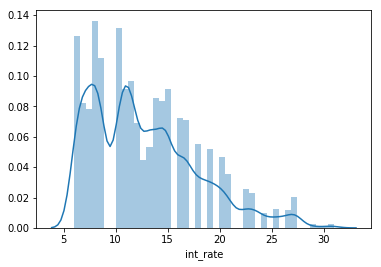

In [72]:
import seaborn as sns
sns.distplot(managers['int_rate']);

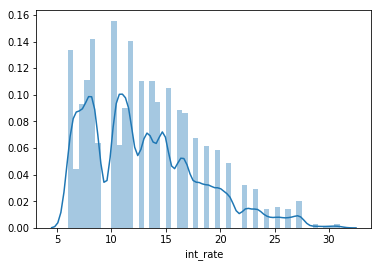

In [74]:
sns.distplot(plebians['int_rate']);

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [75]:
df['issue_d'].head().values

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [76]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [79]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df['issue_d'].dt.year

In [0]:
df['issue_d'].dt.month

In [0]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

In [0]:
df.head()

In [0]:
df['issue_month'].value_counts()

In [0]:
df.dtypes

In [89]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df['earliest_cr_line'].head()

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],
                                       infer_datetime_format=True)

In [0]:
df['issue_d'] - df['earliest_cr_line']

In [0]:
(df['issue_d'] - df['earliest_cr_line']).dt.days

In [115]:
df['dayy_from_earliest_credit_to_issue'] = (
df['issue_d'] - df['earliest_cr_line']).dt.days

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,dayy_from_earliest_credit_to_issue
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,9279.39,9279.39,964.08,964.08,720.61,243.47,0.0,0.0,0.0,Apr-2019,324.23,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8370
1,9600,9600,9600.0,36 months,12.98,323.37,B,B5,Unknown,NaN,MORTGAGE,35704.0,Not Verified,2018-12-01,Current,n,home_improvement,Home improvement,401xx,KY,0.84,0,2003-11-01,0,69.0,NaN,5,0,748,11.5%,23,w,8934.25,8934.25,994.35,994.35,665.75,328.60,0.0,0.0,0.0,Apr-2019,323.37,May-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,748,0,0,0,0,44.0,0,NaN,0,3,748,12.0,6500,0,0,1,3,150.0,3452.0,17.8,0,0,181.0,100,13,13,0,16.0,NaN,3.0,NaN,0,1,1,2,2,16,5,7,1,5,0.0,0,0,0,95.5,0.0,0,0,6500,748,4200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,5509
2,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,2006-09-01,4,59.0,NaN,15,0,5199,19.2%,20,w,3762.39,3762.39,459.24,459.24,237.61,221.63,0.0,0.0,0.0,Apr-2019,155.68,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,

In [0]:
df['days_from_earliest_credit_to_issue'].describe()

# ASSIGNMENT

- Replicate the lesson code. I replicate the code from the begging of the document.


- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
####Conver the "term" column from string to integer


In [0]:
df[df['term'] == 36 months

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01